<a href="https://colab.research.google.com/github/invegat/DS-Sprint-02-Storytelling-With-Data/blob/master/module4-sequence-your-narrative/LS_DS_124_Sequence_your_narrative_LESSON_SOLUTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Sequence your narrative

Create a sequence of visualizations inspired by [Hans Rosling's 200 Countries, 200 Years, 4 Minutes](https://www.youtube.com/watch?v=jbkSRLYSojo).

Using this [data from Gapminder](https://github.com/open-numbers/ddf--gapminder--systema_globalis/):
- https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv
- https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv
- https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv
- https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv
- https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv

Variables --> Visual Encodings
- Income --> x
- Lifespan --> y
- Region --> color
- Population --> size
- Year --> animation frame (alternative: small multiple)
- Country --> annotation

Qualitative --> Verbal
- Editorial / contextual explanation --> audio narration (alternative: text)


| Year | Country | Region   | Income | Lifespan | Population |
|------|---------|----------|--------|----------|------------|
| 1818 | USA     | Americas | ###    | ##       | #          |
| 1918 | USA     | Americas | ####   | ###      | ##         |
| 2018 | USA     | Americas | #####  | ###      | ###        |
| 1818 | China   | Asia     | #      | #        | #          |
| 1918 | China   | Asia     | ##     | ##       | ###        |
| 2018 | China   | Asia     | ###    | ###      | #####      |


## Upgrade Seaborn

Make sure you have at least version 0.9.0.

In Colab, go to **Restart runtime** after you run the `pip` command.

In [2]:
!pip install --upgrade seaborn

    100% |████████████████████████████████| 215kB 21.6MB/s 
  Found existing installation: seaborn 0.7.1
    Uninstalling seaborn-0.7.1:
      Successfully uninstalled seaborn-0.7.1


In [3]:
import seaborn as sns
sns.__version__

'0.7.1'

## More imports

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Load & look at data

In [0]:
income = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv')

In [0]:
lifespan = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv')

In [0]:
population = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv')

In [0]:
entities = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv')

In [0]:
concepts = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv')

In [10]:
income.shape, lifespan.shape, population.shape, entities.shape, concepts.shape

((44268, 3), (44370, 3), (51939, 3), (273, 33), (590, 16))

In [11]:
income.head()

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted
0,abw,1800,833
1,abw,1801,833
2,abw,1802,833
3,abw,1803,833
4,abw,1804,833


In [12]:
lifespan.head()

,geo,time,life_expectancy_years
0,abw,1800,34.42
1,abw,1801,34.42
2,abw,1802,34.42
3,abw,1803,34.42
4,abw,1804,34.42


In [13]:
population.head()

,geo,time,population_total
0,abw,1800,19286
1,abw,1801,19286
2,abw,1802,19286
3,abw,1803,19286
4,abw,1804,19286


In [14]:
pd.options.display.max_columns = None
entities.head()

,country,alt_5,alternative_1,alternative_2,alternative_3,alternative_4_cdiac,arb1,arb2,arb3,arb4,arb5,arb6,g77_and_oecd_countries,gapminder_list,god_id,gwid,income_groups,is--country,iso3166_1_alpha2,iso3166_1_alpha3,iso3166_1_numeric,iso3166_2,landlocked,latitude,longitude,main_religion_2008,name,pandg,un_state,unicode_region_subtag,upper_case_name,world_4region,world_6region
0,abkh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Abkhazia,GE-AB,i0,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abkhazia,NaN,False,NaN,NaN,europe,europe_central_asia
1,abw,NaN,NaN,NaN,NaN,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,others,Aruba,AW,i12,high_income,True,AW,ABW,533.0,NaN,coastline,12.50000,-69.96667,christian,Aruba,NaN,False,AW,ARUBA,americas,america
2,afg,NaN,Islamic Republic of Afghanistan,NaN,NaN,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,g77,Afghanistan,AF,i1,low_income,True,AF,AFG,4.0,NaN,landlocked,33.00000,66.00000,muslim,Afghanistan,AFGHANISTAN,True,AF,AFGHANISTAN,asia,south_asia
3,ago,NaN,NaN,NaN,NaN,Angola,NaN,NaN,NaN,NaN,NaN,NaN,g77,Angola,AO,i7,upper_middle_income,True,AO,AGO,24.0,NaN,coastline,-12.50000,18.50000,christian,Angola,ANGOLA,True,AO,ANGOLA,africa,sub_saharan_africa
4,aia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Anguilla,AI,i8,NaN,True,AI,AIA,660.0,NaN,coastline,18.21667,-63.05000,christian,Anguilla,NaN,False,AI,ANGUILLA,americas,america


In [15]:
concepts.head()

,concept,color,concept_type,description,description_long,domain,drill_up,indicator_url,name,name_catalog,name_short,scales,source,source_long,source_url,tags
0,adults_with_hiv_percent_age_15_49,NaN,measure,The estimated percentage of adults aged 15 to ...,NaN,NaN,NaN,NaN,"Adults with HIV (%, age 15-49)","Adults with HIV (%, age 15-49)",Adults with HIV,"[""log"", ""linear""]",NaN,NaN,http://www.gapminder.org/gapminder-world/docum...,hiv
1,age_at_1st_marriage_women,NaN,measure,"The mean age, in years, of first marriage for ...",NaN,NaN,NaN,NaN,Age at 1st marriage (women),Age at 1st marriage (women),Age at 1st marriage,"[""linear"", ""log""]",NaN,NaN,http://spreadsheets.google.com/pub?key=t4eF8H_...,population
2,aged_15_24_employment_rate_percent,NaN,measure,"Percentage of total population, age group 15-2...",NaN,NaN,NaN,NaN,Aged 15-24 employment rate (%),Aged 15-24,Employment rate (%),"[""linear"", ""log""]",NaN,NaN,http://ilo.org/legacy/english/global-reports/k...,employment_rate
3,aged_15_24_unemployment_rate_percent,NaN,measure,"Percentage of total population, age group 15-2...",NaN,NaN,NaN,NaN,Aged 15-24 unemployment rate (%),Aged 15-24,Unemployment rate (%),"[""linear"", ""log""]",NaN,NaN,http://ilo.org/legacy/english/global-reports/k...,unemployment
4,aged_15_64_labour_force_participation_rate_per...,NaN,measure,"For age group 15-64, percentage of all labour ...",NaN,NaN,NaN,NaN,Aged 15-64 labour force participation rate (%),Aged 15-64,Labour force participation rate (%),"[""linear"", ""log""]",NaN,NaN,http://ilo.org/legacy/english/global-reports/k...,labour_force_participation


## Merge data

https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf

In [0]:
# pd.merge?

In [0]:
df = pd.merge(income, lifespan)

In [18]:
income.shape, lifespan.shape, df.shape

((44268, 3), (44370, 3), (41790, 4))

In [19]:
df.head()

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years
0,abw,1800,833,34.42
1,abw,1801,833,34.42
2,abw,1802,833,34.42
3,abw,1803,833,34.42
4,abw,1804,833,34.42


In [20]:
entities[entities.country=='abw'].T

,1
country,abw
alt_5,NaN
alternative_1,NaN
alternative_2,NaN
alternative_3,NaN
alternative_4_cdiac,Aruba
arb1,NaN
arb2,NaN
arb3,NaN
arb4,NaN


In [21]:
entities.world_4region.value_counts()

asia        80
europe      73
africa      61
americas    57
Name: world_4region, dtype: int64

In [22]:
entities.world_6region.value_counts()

europe_central_asia         77
america                     53
sub_saharan_africa          53
east_asia_pacific           46
middle_east_north_africa    23
south_asia                   8
Name: world_6region, dtype: int64

In [23]:
variables = ['country', 'name', 'world_6region']
entities[variables].head()

,country,name,world_6region
0,abkh,Abkhazia,europe_central_asia
1,abw,Aruba,america
2,afg,Afghanistan,south_asia
3,ago,Angola,sub_saharan_africa
4,aia,Anguilla,america


In [24]:
df.head()

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years
0,abw,1800,833,34.42
1,abw,1801,833,34.42
2,abw,1802,833,34.42
3,abw,1803,833,34.42
4,abw,1804,833,34.42


In [0]:
df = pd.merge(df, population)

In [26]:
# Preview
pd.merge(df, entities[variables], 
         how='inner', left_on='geo', right_on='country').head()

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years,population_total,country,name,world_6region
0,abw,1800,833,34.42,19286,abw,Aruba,america
1,abw,1801,833,34.42,19286,abw,Aruba,america
2,abw,1802,833,34.42,19286,abw,Aruba,america
3,abw,1803,833,34.42,19286,abw,Aruba,america
4,abw,1804,833,34.42,19286,abw,Aruba,america


In [27]:
df = pd.merge(df, entities[variables], 
              how='inner', left_on='geo', right_on='country')

df.drop(columns=['geo', 'country'], inplace=True)

df.rename(columns={
    'time': 'year', 
    'income_per_person_gdppercapita_ppp_inflation_adjusted': 'income', 
    'life_expectancy_years': 'lifespan', 
    'population_total': 'population', 
    'name': 'country', 
    'world_6region': 'region'
}, inplace=True)

df.shape

(41790, 6)

In [28]:
df.head()

,year,income,lifespan,population,country,region
0,1800,833,34.42,19286,Aruba,america
1,1801,833,34.42,19286,Aruba,america
2,1802,833,34.42,19286,Aruba,america
3,1803,833,34.42,19286,Aruba,america
4,1804,833,34.42,19286,Aruba,america


## Explore data

In [29]:
df.describe()

,year,income,lifespan,population
count,41790.000000,41790.000000,41790.000000,4.179000e+04
mean,1909.357406,4778.593683,43.267181,1.332550e+07
std,63.322969,10502.602580,16.394240,6.502349e+07
min,1800.000000,247.000000,1.000000,2.128000e+03
25%,1854.000000,884.000000,31.200000,3.760282e+05
50%,1909.000000,1449.000000,35.500000,1.915244e+06
75%,1964.000000,3536.750000,56.340000,6.260147e+06
max,2018.000000,177522.000000,84.170000,1.415046e+09


In [30]:
df.describe(exclude=[np.number])

,country,region
count,41790,41790
unique,194,6
top,Nigeria,europe_central_asia
freq,219,10991


In [31]:
df.country.unique()

array(['Aruba', 'Afghanistan', 'Angola', 'Albania', 'Andorra',
       'United Arab Emirates', 'Argentina', 'Armenia',
       'Antigua and Barbuda', 'Australia', 'Austria', 'Azerbaijan',
       'Burundi', 'Belgium', 'Benin', 'Burkina Faso', 'Bangladesh',
       'Bulgaria', 'Bahrain', 'Bahamas', 'Bosnia and Herzegovina',
       'Belarus', 'Belize', 'Bermuda', 'Bolivia', 'Brazil', 'Barbados',
       'Brunei', 'Bhutan', 'Botswana', 'Central African Republic',
       'Canada', 'Switzerland', 'Chile', 'China', "Cote d'Ivoire",
       'Cameroon', 'Congo, Dem. Rep.', 'Congo, Rep.', 'Colombia',
       'Comoros', 'Cape Verde', 'Costa Rica', 'Cuba', 'Cyprus',
       'Czech Republic', 'Germany', 'Djibouti', 'Dominica', 'Denmark',
       'Dominican Republic', 'Algeria', 'Ecuador', 'Egypt', 'Eritrea',
       'Spain', 'Estonia', 'Ethiopia', 'Finland', 'Fiji', 'France',
       'Micronesia, Fed. Sts.', 'Gabon', 'United Kingdom', 'Georgia',
       'Ghana', 'Guinea', 'Gambia', 'Guinea-Bissau', 'Equatoria

In [32]:
usa = df[df.country=='United States']
usa[usa.year.isin([1818, 1918, 2018])]

,year,income,lifespan,population,country,region
39399,1818,2258,39.41,9879049,United States,america
39499,1918,9371,47.18,106721812,United States,america
39599,2018,54898,79.14,326766748,United States,america


In [33]:
china = df[df.country=='China']
china[china.year.isin([1818, 1918, 2018])]

,year,income,lifespan,population,country,region
7120,1818,985,32.00,374161494,China,east_asia_pacific
7220,1918,989,22.13,462444535,China,east_asia_pacific
7320,2018,16018,76.92,1415045928,China,east_asia_pacific


## Plot visualization

In [34]:
now = df[df.year==2018]
print(now.shape)
now.sample(10)

(188, 6)


,year,income,lifespan,population,country,region
3769,2018,18853,75.32,7036848,Bulgaria,europe_central_asia
33907,2018,629,58.03,15181925,Somalia,sub_saharan_africa
38723,2018,2780,65.46,59091392,Tanzania,sub_saharan_africa
10871,2018,13726,77.86,42008054,Algeria,middle_east_north_africa
31279,2018,2704,72.19,5052776,Palestine,middle_east_north_africa
30841,2018,27909,81.30,10291196,Portugal,europe_central_asia
24224,2018,12984,80.08,444259,Maldives,south_asia
10167,2018,3539,67.10,971408,Djibouti,middle_east_north_africa
2236,2018,44645,81.84,8751820,Austria,europe_central_asia
20720,2018,36767,81.35,51164435,South Korea,east_asia_pacific


In [0]:
#sns.relplot?

In [36]:
sns.relplot(x='income', y='lifespan', hue='region', size='population', data=now, sizes=(1, 400));

AttributeError: ignored

## Analyze outliers

In [0]:
now[now.income > 80000]

In [0]:
entities[entities.name=='Macao, China'].T

In [0]:
qatar = now[now.country=='Qatar']
qatar_income = qatar.income.values[0]
qatar_lifespan = qatar.lifespan.values[0]

In [0]:
sns.relplot(x='income', y='lifespan', hue='region', size='population', data=now, sizes=(1, 400))

plt.text(x=qatar_income-5000, y=qatar_lifespan+1, s='Qatar')

plt.title('Qatar has the highest incomes in 2018');

## Plot multiple years

In [0]:
# now = df[df.year==2018]

years = [1818, 1918, 2018]

centuries = df[df.year.isin(years)]
#centuries.income.index = ['1000','10,000','100,000']

In [0]:
ax = sns.relplot(x='income', y='lifespan', hue='region', size='population', sizes=(1, 400), 
            col='year', data=centuries)
plt.xscale('log');
ax.set_xticklabels(['10','100','1000','10,000','100,000']);


## Consistent countries per year?

In [0]:
centuries.groupby('year').country.count()

In [0]:
years_per_country = centuries.groupby('country').year.count()
years_per_country[years_per_country < 3]

## Point out a story

In [0]:
years = [1918, 1938, 1958, 1978, 1998, 2018]

subset = df[df.year.isin(years)]

sns.relplot(x='income', y='lifespan', hue='region', size='population', sizes=(1, 400), 
            row='year', data=subset)

plt.xscale('log')
plt.xlim((150, 150000));

In [0]:
for year in years:

    sns.relplot(x='income', y='lifespan', hue='region', size='population', sizes=(1, 400), 
                data=df[df.year==year])

    plt.xscale('log')
    plt.xlim((150, 150000))
    plt.ylim((20, 90))
    plt.title(year)
    plt.axhline(y=50, color='grey');

#### 100 years ago, few countires had lifespans _above_ 50 years

In [0]:
df[(df.year==1918) & (df.lifespan >= 50)]

#### Today, no countries have lifespans _below_ 50 years

In [0]:
print(f'India 1998 to 2018 Linear Regression Population Growth coefficients income: {lr.coef_[0]}  lifespan: {lr.coef_[1]}  intercept: {lr.intercept_}')

from mpl_toolkits.mplot3d import Axes3D
X2, X3 = np.meshgrid(india['income'], india['lifespan'])

def f(x,y):
  z = lr.coef_[0] * x + lr.coef_[1] * y + lr.intercept_
  return z

X1 = f(X2, X3)
ax = plt.axes(projection='3d')
ax.plot_surface(X2, X3, X1, rstride=1, cstride=1, 
                cmap='viridis', edgecolor=None, alpha=0.5)
ax.scatter(india['income'],india['lifespan'], india['population_growth'], c='r', marker='^', s=80, alpha=0.5)
ax.set_xlabel('income')
ax.set_ylabel('lifespan')
ax.set_zlabel('Population Growth Rate')
plt.show()

In [0]:
df[(df.year==2018) & (df.lifespan < 50)]

In [40]:

from sklearn.linear_model import LinearRegression
india = df[df.country=='India'].copy()
india.index = range(1, india.shape[0] + 1)

def il(i, df = india, key='population'):
  return df.iloc[[i-1]][key][i]

# B3 - B2 = 656   
# (A3 - A2) - (A2 - A1)
# A2 - A1 - ((A3 - A2) - (A2 - A1))
# A2 - A1 - A3 + A2 + A2 - A1
# 3 * A2 - 2 * A1  - A3
pop1800_delta = 3 * il(2) - 2 * il(1) - il(3) # estimate
pop_delta = [pop1800_delta if i == 0 else il(i+1) - il(i) for i in range(0,india.shape[0])]
india['population_growth'] = pop_delta
india21 = india[198:219].copy()
india21.index = range(1, india21.shape[0] + 1)
lr = LinearRegression().fit(india21[["income", "lifespan"]], india21['population_growth'])
india21

,year,income,lifespan,population,country,region,population_growth
1,1998,2288,61.65,1015974042,India,south_asia,18568724
2,1999,2446,61.99,1034539214,India,south_asia,18565172
3,2000,2495,62.34,1053050912,India,south_asia,18511698
4,2001,2570,62.67,1071477855,India,south_asia,18426943
5,2002,2623,63.06,1089807112,India,south_asia,18329257
6,2003,2783,63.46,1108027848,India,south_asia,18220736
7,2004,2955,63.83,1126135777,India,south_asia,18107929
8,2005,3179,64.23,1144118674,India,south_asia,17982897
9,2006,3420,64.61,1161977719,India,south_asia,17859045
10,2007,3699,65.00,1179681239,India,south_asia,17703520


India 1998 to 2018 Linear Regression Population Growth coefficients income: -624.5048358587894  lifespan: -197284.18622769794  intercept: 32441797.720427565


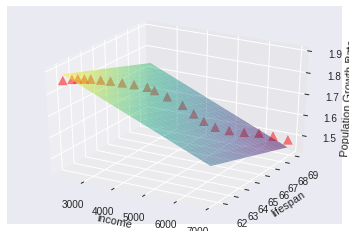

In [41]:
print(f'India 1998 to 2018 Linear Regression Population Growth coefficients income: {lr.coef_[0]}  lifespan: {lr.coef_[1]}  intercept: {lr.intercept_}')

from mpl_toolkits.mplot3d import Axes3D
X2, X3 = np.meshgrid(india21['income'], india21['lifespan'])

def f(x,y):
  z = lr.coef_[0] * x + lr.coef_[1] * y + lr.intercept_
  return z

X1 = f(X2, X3)
ax = plt.axes(projection='3d')
ax.plot_surface(X2, X3, X1, rstride=1, cstride=1, 
                cmap='viridis', edgecolor=None, alpha=0.5)
ax.scatter(india21['income'],india21['lifespan'], india21['population_growth'], c='r', marker='^', s=80, alpha=0.5)
ax.set_xlabel('income')
ax.set_ylabel('lifespan')
ax.set_zlabel('Population Growth Rate')
plt.show()

India 1800 to 2018 Linear Regression Population Growth Delta (second derivitive of Population) coefficients income: -157.49856037101333  lifespan: 7910.860082502808  intercept: 19110.163055509664


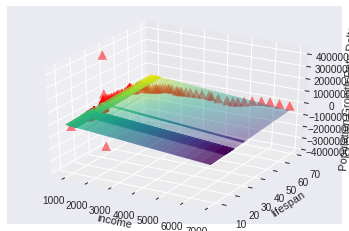

In [43]:
# from sklearn.linear_model import LinearRegression
# india = df[df.country=='India'].copy()
# india.index = range(1, india.shape[0] + 1)

def il(i, df = india, key='population_growth'):
  return df.iloc[[i-1]][key][i]

# B3 - B2 = 656   
# (A3 - A2) - (A2 - A1)
# A2 - A1 - ((A3 - A2) - (A2 - A1))
# A2 - A1 - A3 + A2 + A2 - A1
# 3 * A2 - 2 * A1  - A3
pop1800_delta_delta = 3 * il(2) - 2 * il(1) - il(3) # estimate
pop_delta_delta = [pop1800_delta_delta if i == 0 else il(i+1) - il(i) for i in range(0,india.shape[0])]
india['population_growth_delta'] = pop_delta_delta
# india = india[198:219]
# india.index = range(1, india.shape[0] + 1)
lr = LinearRegression().fit(india[["income", "lifespan"]], india['population_growth_delta'])
#india
print(f'India 1800 to 2018 Linear Regression Population Growth Delta (second derivitive of Population) coefficients income: {lr.coef_[0]}  lifespan: {lr.coef_[1]}  intercept: {lr.intercept_}')

from mpl_toolkits.mplot3d import Axes3D
X2, X3 = np.meshgrid(india['income'], india['lifespan'])

def f(x,y):
  z = lr.coef_[0] * x + lr.coef_[1] * y + lr.intercept_
  return z

X1 = f(X2, X3)
ax = plt.axes(projection='3d')
ax.plot_surface(X2, X3, X1, rstride=1, cstride=1, 
                cmap='viridis', edgecolor=None, alpha=0.5)
ax.scatter(india['income'],india['lifespan'], india['population_growth_delta'], c='r', marker='^', s=80, alpha=0.5)
ax.set_xlabel('income')
ax.set_ylabel('lifespan')
ax.set_zlabel('Population Growth Rate Delta')
plt.show()

## Get interactive with Google Colab

In [0]:
year = 2006 #@param {type:"slider", min:1800, max:2018, step:1}

sns.relplot(x='income', y='lifespan', hue='region', size='population', 
            data=df[df.year==year])

plt.xscale('log')
plt.xlim((150, 150000))
plt.ylim((20, 90))
plt.title(year);

In [0]:
from google.colab import widgets
tb = widgets.TabBar([str(year) for year in years])
for tab, year in zip(tb, years):
    sns.relplot(x='income', y='lifespan', hue='region', size='population', 
                data=df[df.year==year])

    plt.xscale('log')
    plt.xlim((150, 150000))
    plt.ylim((20, 90));

### Stretch goals
- [ipywidgets](https://github.com/jupyter-widgets/ipywidgets)
- [Matplotlib animation](https://matplotlib.org/examples/animation/index.html)
- [Connected scatter plots](http://www.thefunctionalart.com/2012/09/in-praise-of-connected-scatter-plots.html)
- [Idyll markup language](https://idyll-lang.org/) for "scrollytelling"